<a href="https://www.kaggle.com/code/anjusukumaran4/kidney-stone-prediction-multi-layer-perception?scriptVersionId=136205518" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

### Kidney Stone Prediction based on Urine Analysis using Multi - layer Perception Classifier

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data

In [2]:
# original data
df=pd.read_csv("/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv")
#train and test dataset
train_df = pd.read_csv('/kaggle/input/playground-series-s3e12/train.csv')
test_df = pd.read_csv('/kaggle/input/playground-series-s3e12/test.csv')

## EDA

In [3]:
#loading first 5 rows
train_df.head()

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1


In [4]:
train_df.columns

Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       414 non-null    int64  
 1   gravity  414 non-null    float64
 2   ph       414 non-null    float64
 3   osmo     414 non-null    int64  
 4   cond     414 non-null    float64
 5   urea     414 non-null    int64  
 6   calc     414 non-null    float64
 7   target   414 non-null    int64  
dtypes: float64(4), int64(4)
memory usage: 26.0 KB


In [6]:
print('shape of the train dataset : ',train_df.shape)
print('shape of the train dataset : ',test_df.shape)

shape of the train dataset :  (414, 8)
shape of the train dataset :  (276, 7)


Checking for null values

In [7]:
train_df.isnull().sum()

id         0
gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

No null values

<Axes: xlabel='target', ylabel='count'>

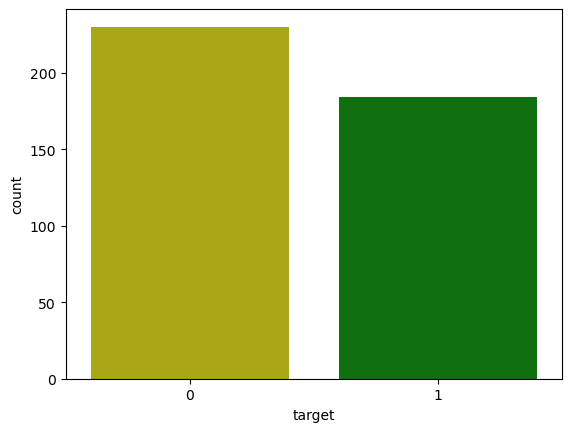

In [8]:
#analysing target column
sns.countplot(x=train_df['target'],palette=['y','g'])

## Heat map of correlation matrix

In [9]:
cr=train_df.corr()
cr

,id,gravity,ph,osmo,cond,urea,calc,target
id,1.000000,-0.004775,-0.086619,0.008030,0.032843,-0.023822,0.032360,0.018222
gravity,-0.004775,1.000000,-0.290349,0.692317,0.470433,0.631710,0.494304,0.282577
ph,-0.086619,-0.290349,1.000000,-0.309495,-0.190185,-0.279749,-0.214402,-0.094983
osmo,0.008030,0.692317,-0.309495,1.000000,0.708480,0.809880,0.472114,0.244770
cond,0.032843,0.470433,-0.190185,0.708480,1.000000,0.499109,0.330609,0.172224
urea,-0.023822,0.631710,-0.279749,0.809880,0.499109,1.000000,0.489879,0.265211
calc,0.032360,0.494304,-0.214402,0.472114,0.330609,0.489879,1.000000,0.467439
target,0.018222,0.282577,-0.094983,0.244770,0.172224,0.265211,0.467439,1.000000


<Axes: >

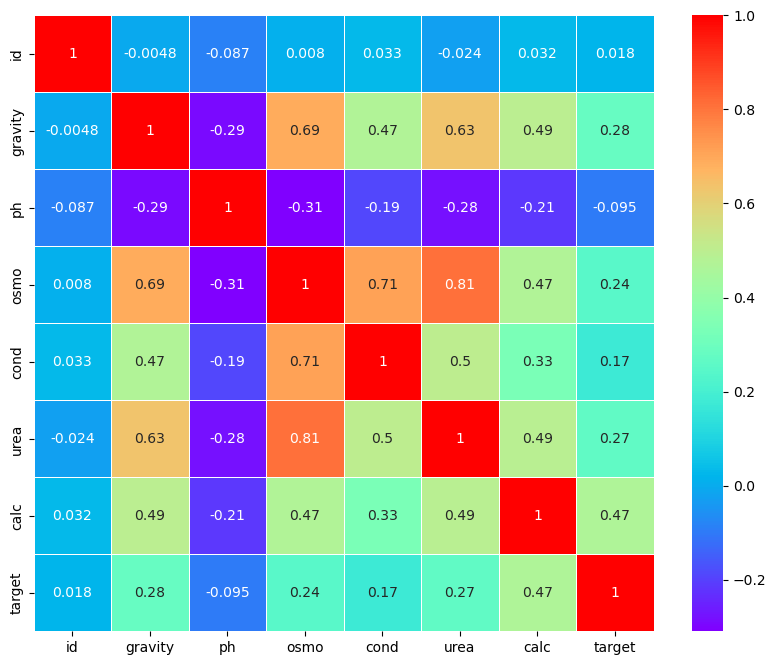

In [10]:
plt.figure(figsize=(10,8))
sns.heatmap(cr,annot=True,linewidth=0.4,cmap='rainbow')

## Model Building

In [11]:
X=train_df.drop(['target'],axis=1)
y=train_df['target']

In [12]:
from sklearn.model_selection import train_test_split

X_train,X_val,y_train,y_val=train_test_split(X,y,test_size=0.2,random_state=0)

## Multi - layer Perception Classifier

The multilayer perceptron (MLP) is a feedforward artificial neural network model that maps input data sets to a set of appropriate outputs. An MLP consists of multiple layers and each layer is fully connected to the following one. The nodes of the layers are neurons with nonlinear activation functions, except for the nodes of the input layer. Between the input and the output layer there may be one or more nonlinear hidden layers.Unlike other classification algorithms such MLPClassifier relies on an underlying Neural Network to perform the task of classification.

In [13]:
from sklearn.neural_network import MLPClassifier

mlpc=MLPClassifier(hidden_layer_sizes=(150,), activation='relu',learning_rate_init=0.002,random_state=0)
mlpc.fit(X_train,y_train)

MLPClassifier(hidden_layer_sizes=(150,), learning_rate_init=0.002,
              random_state=0)

## Prediction

In [14]:
pred=mlpc.predict(X_val)

## Accuracy

In [15]:
from sklearn.metrics import accuracy_score
acc=accuracy_score(y_val,pred)


In [16]:
print("Accuracy : ",round(acc,2)*100, "%")

Accuracy :  72.0 %
